# Исследование рынка компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию. 

Работу над проектом начнем с того, что добавим необходимые для работы библиотеки, откроем датафрейм, выведем общую информацию по нему.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(15))
display(data.tail(15))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод: </b> датасет содержит 16715 строк и 11 столбцов, в некоторых столбцах имеется весьма много пропущенных значений - попробуем исправить это на следующих этапах работы.

### Предобработка данных

Заменим названия столбцов - приведем их к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()

Изменим тип данных в некоторых столбцах датафрейма. Как вы видим неподходящий формат данных в столбце с годом выхода ('year_of_release') и оценкой пользователей ('user_score'). Займемся этими столбцами.

В столбце "year_of_release" поменяем тип на наиболее подходящий - поскольку это год, то это будет целочисленное число. А также выведем информацию о том какие значения содержатся в этом столбце. 

In [4]:
data['year_of_release'] = data['year_of_release'].convert_dtypes()
print(data['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64


Как видим все значения столбца преобразовались в целочисленные значения и в данном столбце нет каких-либо необычных или нелогичных значений

Выведем информацию о том какие значения содержатся в столбце "user_score"

In [5]:
print(data['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.3       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Как мы видим в столбце "user_score" много значений с аббревиатурой "tbd". Она означает "будет определено" - т.е. это пропущенное значение. Поменяем эти пропуски на более привычное для пропусков значение NaN и изменими тип данных на наиболее подходящий - поскольку это числовая оценка, то это будет число с плавающей точкой

In [6]:
data["user_score"] = pd.to_numeric(data['user_score'], errors='coerce')
print(data["user_score"].value_counts())

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64


Посмортим как изменились типы данных в нашем датасете

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Как видим типы данных успешно изменились на более подходящие

Определим количество пропущенных значений в каждом столбце датафрейма

In [8]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Поскольку в столбцах "name" и "genre" всего по 2 пропуска и без них нам сложно будет судить о какой игре или жанре идет речь - удалим эти строки. Пропуски могли возникнуть из-за невнимательного заполнения данных пользователем или из-за технических ошибок (ошибки при загрузке/выгрузке данных и др.)

In [9]:
data = data.dropna(subset=['name','genre'])

В названиях некоторых игр имеется год, но на практике это не означает, что игра была выпущена именно в этом году, а также одна и та же игра могла выходить в разное время на разных платформах. Рейтинг и оценки нам будет проблематично определить - поскольку они не зависят от других данных и сделать какие-либо прогнозы затруднительно. Поэтому пока оставим пропуски в этих столбцах без изменений. Пропуски в этих столбцах могли возникнуть как по техническим причинам(из-за потери части данных (например, автоматизированная система сбора информации дала сбой) или на этапе загрузки/выгрузки данных была потеряна часть информации), а также пропуски могли возникнуть по причине человеческого фактора - из-за невнимательного заполнения данных пользователем.

Заполним пропуски в столбце "rating" значением «NR» («No Rating») — «Рейтинг отсутствует»

In [10]:
data['rating'] = data['rating'].fillna('NR')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. А также выведем этот столбец на экран

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
print(data['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64


Обновим индексы поскольку некоторые строки таблицы были удалены:

In [12]:
data = data.reset_index(drop = True)

<b>Вывод: </b> были приведены к нижнему регистру названия всех столбцов, в некоторых столбцах был изменен тип данных на более подходящий, в некоторых были удалены или заменены непонятные значения, а в некоторых были указаны причины по которым замены трудно осуществить, а также высказаны причины по которым могли возникнуть пропуски. Также был создан новый столбец с сумарными продажами.

### Исследовательский анализ данных

Изучим данные о выпуске игр в разные года. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

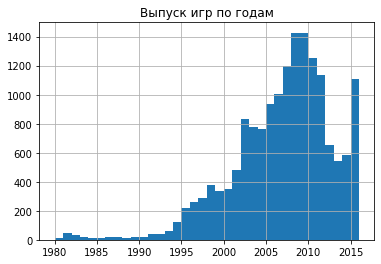

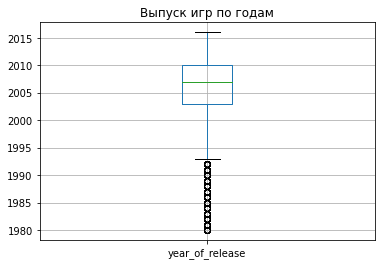

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [13]:
data['year_of_release'].hist(bins = 36)
plt.title('Выпуск игр по годам')
plt.show()
data.boxplot(column='year_of_release')
plt.title('Выпуск игр по годам')
plt.show()
data['year_of_release'].describe()

Как мы видим игры стали активно выпускать с начала 90-ых годов и продолжают до нынешнего времени - большинство выпущено с 1993 года по 2016 (заключительный год выпуска игр, предоставленных в нашем датафрейме). При этом самая ранняя игра в нашем датафрейме была выпущена в 1980 году, однако выпуск игр в 80-ых был не столь велик, поэтому данные до 1993 года для нас не столь важны.

Рассмотрим как менялись продажи игр в зависимости от платформы. Для этого построим график сумарных продаж во всех регионах по всем платформам.

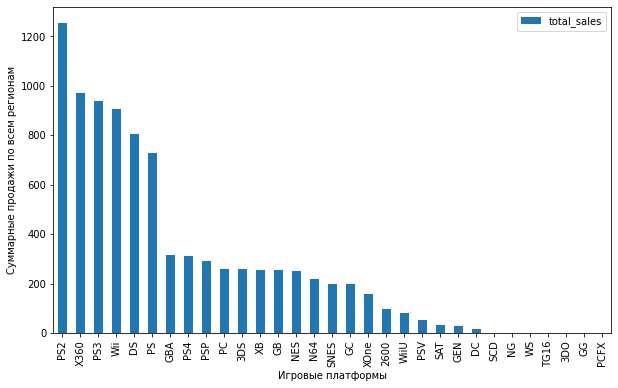

In [14]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые платформы', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

Как мы видим самыми популярными платформами являются PS2, X360 и PS3. Построим для кажой из этих платформ график продаж игр по годам.

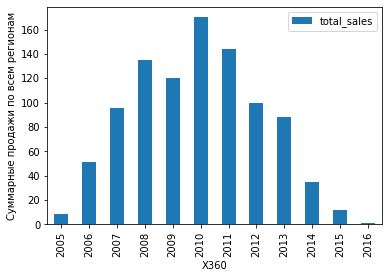

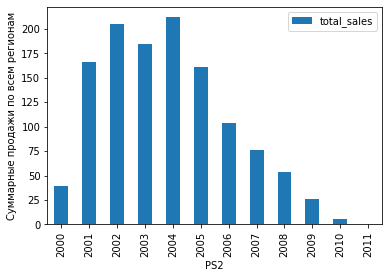

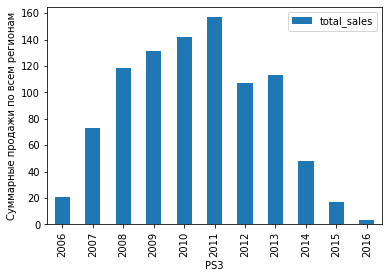

In [15]:
data_x360 = data.loc[data["platform"]=='X360']
data_x360.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'X360', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
data_ps2 = data.loc[data["platform"]=='PS2']
data_ps2.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS2', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
data_ps3 = data.loc[data["platform"]=='PS3']
data_ps3.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS3', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

Наибольшие продажи игр для PS2 пришлись на 2002-2004 года, а для PS3 и X360 пришлись на 2010-2011 год. PS3 и X360 были конкурирующими платформами одного поколения, поэтому пики продаж игр на них приходятся на одни и те же года. А вот PS2 и PS3 являются платформами разных поколений от одного и того же производителя - поэтому на них будет удобнее проследить за какой характерный срок появляются новые и исчезают старые платформы.

Пики продаж для PS2 и PS3 отличаются на 5-7 лет, а в тот период, когда у PS3 были максимальные продажи игры на PS2 уже практически не выпускались. Для подтверждения нашей теории о сроках преемственности поколений платформ выведем информацию о продажах игр по годам для других платформ от этого же производителя, а именно PS и PS4.

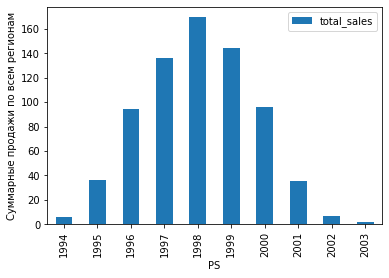

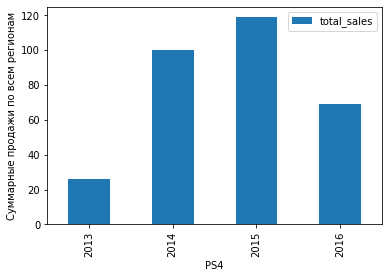

In [16]:
data_ps = data.loc[data["platform"]=='PS']
data_ps.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
data_ps4 = data.loc[data["platform"]=='PS4']
data_ps4.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS4', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

Как мы видим разница в пиках продаж у соседних поколений игровых систем PS и PS2, а также у PS3 и PS4 также составляет около 4-6 лет (учитывая то, что на момент создания датафрейма PS4 была актульной платформой последнего поколения и пики продаж для нее скорее всего были бы еще несколько ближайших лет). Также для каждой платформы заметно, что в момент пика продаж на новой платформе игры для старой уже практически не актуальны.\
Мы можем сделать вывод о том, что временной интервал актуальности платформы около 5-7 лет, общий срок жизни платформы около 10 лет, выход новых поколений платформ происходит каждые 6-7 лет.

Актуальным периодом будем считать тот момент когда последняя выпущенная платформа уже стала обгонять предыдущую по продажам за год. Для семейства PlayStation (PS3 и PS4) это будет 2014 год. Посмотрим каким будет результат для семейства Xbox (X360 и XOne) - для того выведем информацию о продажах игр по годам для этих платформ.

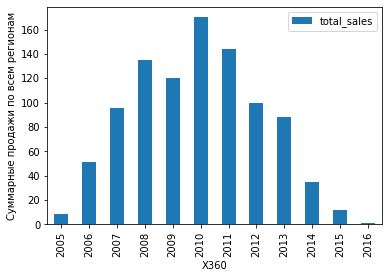

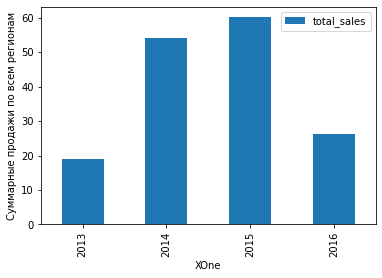

In [17]:
data_x360 = data.loc[data["platform"]=='X360']
data_x360.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'X360', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
data_xone = data.loc[data["platform"]=='XOne']
data_xone.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'XOne', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

Как мы видим для семейства Xbox также в 2014 году новая платформа стала обгонять предыдущую. \
Следовательно актуальный период в нашем анализе будет с 2014 года

Рассмотрим как менялись продажи игр в зависимости от платформы с 2014 года. Для этого построим график сумарных продаж во всех регионах по всем платформам и определим какие из них актуальны.

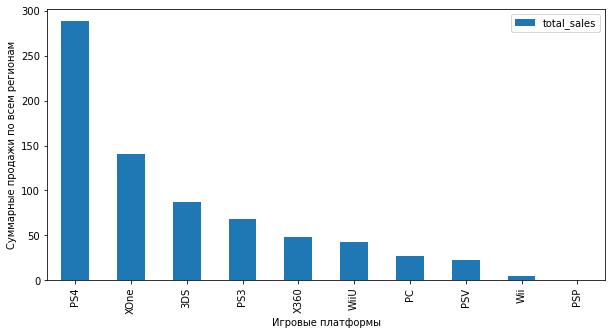

In [18]:
actual_period = data.loc[data["year_of_release"] >= 2014]
actual_period.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).plot(kind='bar', figsize = (10,5),xlabel = 'Игровые платформы', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

Как мы видим после 2014 года игры выпускались для 9 платформ (платформой PSP мы пренебрегаем в силу практически нулевых продаж).

Посмотрим продажи по каждой платформе за актуальный период и попробуем определить какие тенденции продаж наблюдаются для каждой из них.

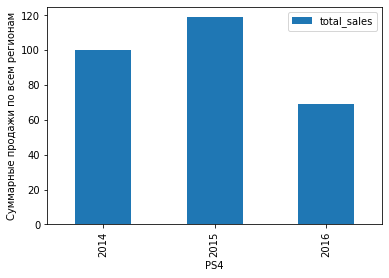

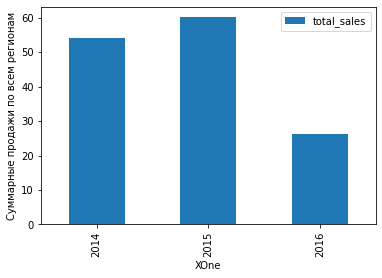

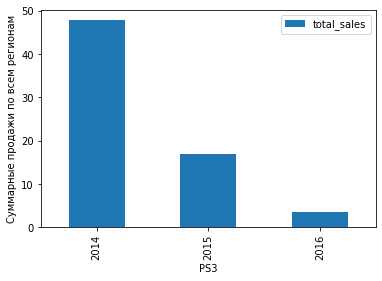

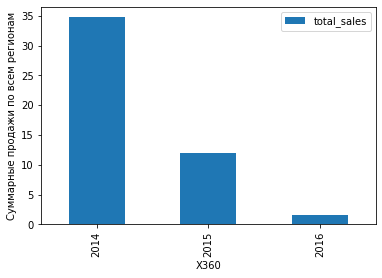

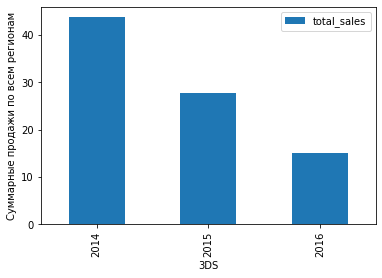

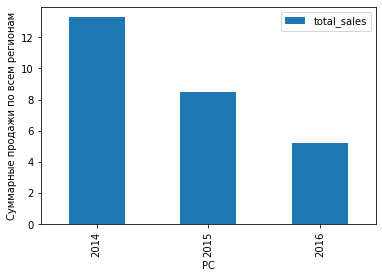

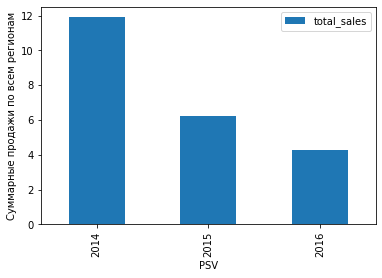

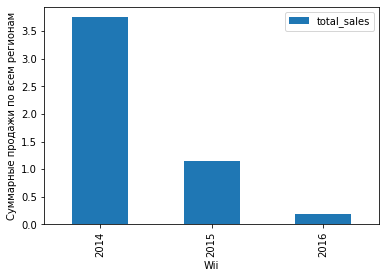

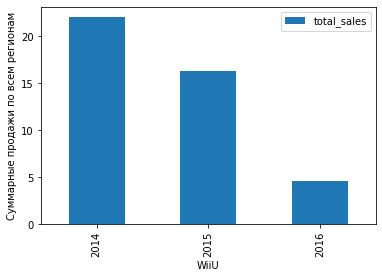

In [19]:
ps4 = actual_period.loc[actual_period["platform"]=='PS4']
ps4.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS4', ylabel = 'Суммарные продажи по всем регионам') 
plt.show()

xone = actual_period.loc[actual_period["platform"]=='XOne']
xone.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'XOne', ylabel = 'Суммарные продажи по всем регионам') 
plt.show()

ps3 = actual_period.loc[actual_period["platform"]=='PS3']
ps3.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PS3', ylabel = 'Суммарные продажи по всем регионам') 
plt.show()

x360 = actual_period.loc[actual_period["platform"]=='X360']
x360.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'X360', ylabel = 'Суммарные продажи по всем регионам') 
plt.show()

three_ds = actual_period.loc[actual_period["platform"]=='3DS']
three_ds.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = '3DS', ylabel = 'Суммарные продажи по всем регионам') 
plt.show()

pc = actual_period.loc[actual_period["platform"]=='PC']
pc.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PC', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

psv = actual_period.loc[actual_period["platform"]=='PSV']
psv.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'PSV', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

wii = actual_period.loc[actual_period["platform"]=='Wii']
wii.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'Wii', ylabel = 'Суммарные продажи по всем регионам')
plt.show()

wiiu = actual_period.loc[actual_period["platform"]=='WiiU']
wiiu.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind='bar', figsize = (6,4),xlabel = 'WiiU', ylabel = 'Суммарные продажи по всем регионам')
plt.show()


Лидируют по продажам платформы PS4 и XOne, они же и являются актуальными и растущимими в рассматриваемом нами актуальном периоде, но в заключительный из предоставленных 2016 год на обеих платформах наблюдается спад - однако это может объясняться тем, что предоставленные нам данные сформированы не на конец 2016 года или не были учтены данные о всех продажах за этот год (например, не по всем регионам предоставлена статистика за весь 2016 год).\
Для всех остальных рассмотренных нами платформ наблюдается одна и таже картина спада - продажи за заключительный 2015 год, в данных за который мы уверены, ощутимо ниже чем за 2014.\
Поэтому к категории растущих мы можем (с некоторыми допущениями о формировании данных за 2016 год) отнести только PS4 и XOne.
Их же мы и будем считать потенциально прибыльными.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период.

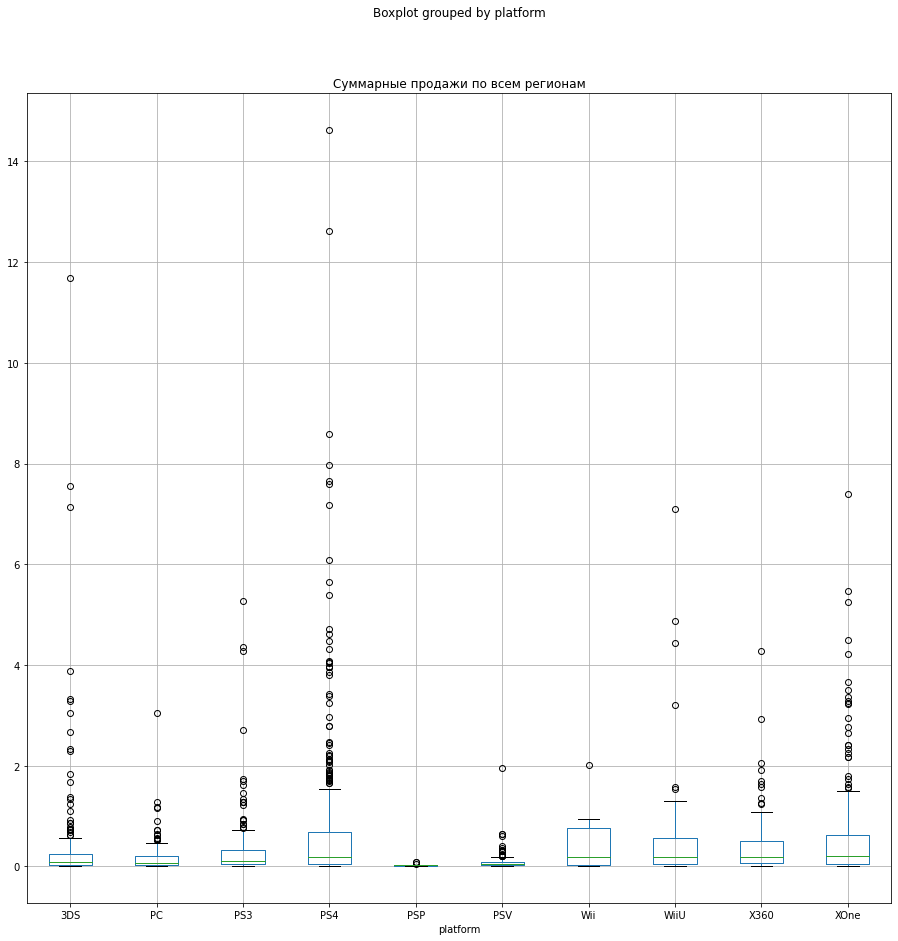

In [20]:
actual_period.boxplot(column = 'total_sales', by = "platform", figsize = (15, 15))
plt.title('Суммарные продажи по всем регионам')
plt.show()

На полученных графиках мы видим, что большинство игр для 3DS, PC, PS3, PSP, PSV, Wii имеют продажи меньше 1 млн, на PS4, WiiU, X360, XOne большинство игр имеют продажи до 2 млн. Однако для каждой платформы имеются игры с весьма или очень высокими продажами - например, на PS4 есть игры с продажами более 14 млн. Самые же скромные продажи у PSP и PSV (что вполне логично, т.к. это мобильные консоли)

Посмотрим как влияют на продажи внутри одной популярной платформы (например, PS4) отзывы пользователей и критиков: построим диаграмму рассеяния, а также посчитаем корреляцию между отзывами и продажами.

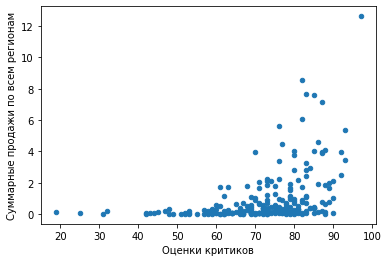

0.40266141068104083


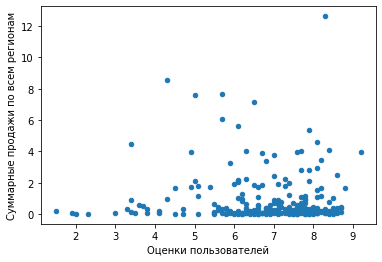

-0.040131589472697356


In [21]:
ps4.plot(kind='scatter', y = 'total_sales', x = "critic_score", xlabel = 'Оценки критиков', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(ps4['total_sales'].corr(ps4['critic_score']))
ps4.plot(kind='scatter', y = 'total_sales', x = "user_score", xlabel = 'Оценки пользователей', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(ps4['total_sales'].corr(ps4['user_score']))

Как мы видим зависимость продаж от оценок критиков весьма мала, а зависимость продаж от оценок пользователей практически отсутствует. Чтобы подтвердить нашу теорию о малой зависимости между продажами и оценками посмотрим как обстоят дела на другой популярной платформе - XOne.

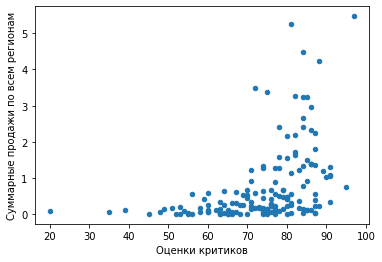

0.42867694370333226


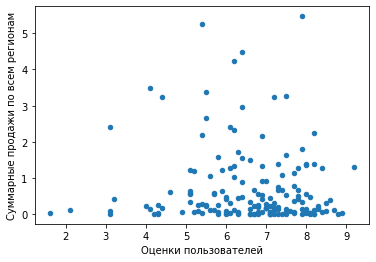

-0.0703839280647581


In [22]:
xone.plot(kind='scatter', y = 'total_sales', x = "critic_score", xlabel = 'Оценки критиков', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(xone['total_sales'].corr(xone['critic_score']))
xone.plot(kind='scatter', y = 'total_sales', x = "user_score", xlabel = 'Оценки пользователей', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(xone['total_sales'].corr(xone['user_score']))

Наблюдаем аналогичную картину и для XOne - слабая корреция между оценками критиков и продажами и почти полное отсутствие корреляции между продажами и оценками пользователей. Дабы удостовериться, что такая ситуация характерна для всех платформ, построим аналогичные графики и сделаем расчет коэффициентов корреции для всего датасета за актуальный период.

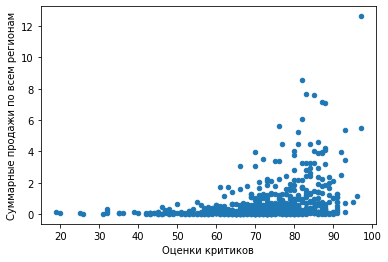

0.328105086966363


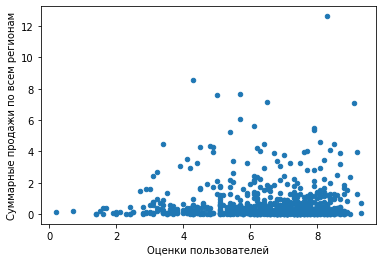

-0.013070305002484585


In [23]:
actual_period.plot(kind='scatter', y = 'total_sales', x = "critic_score", xlabel = 'Оценки критиков', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(actual_period['total_sales'].corr(actual_period['critic_score']))
actual_period.plot(kind='scatter', y = 'total_sales', x = "user_score", xlabel = 'Оценки пользователей', ylabel = 'Суммарные продажи по всем регионам')
plt.show()
print(actual_period['total_sales'].corr(actual_period['user_score']))

Как мы видим для всех платформ характерна слабая корреляция между между оценками критиков и продажами и почти полное отсутствие корреляции между продажами и оценками пользователей.

Посмотрим на общее распределение игр по жанрам и определим самые прибыльные жанры, а также посмотрим выделяются ли жанры с высокими и низкими продажами

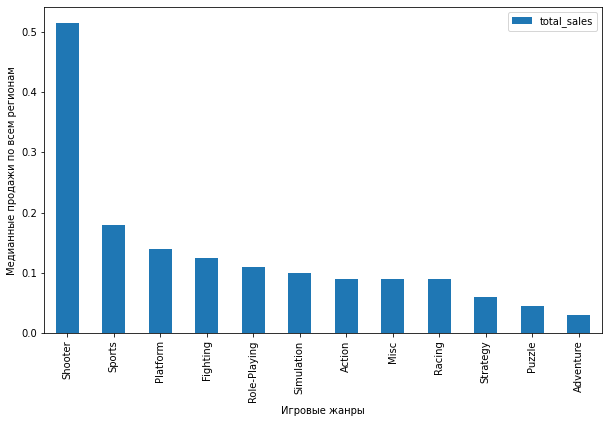

In [24]:
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by='total_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые жанры', ylabel = 'Медианные продажи по всем регионам')
plt.show()

Как мы видим самый популярный и прибыльный жанр это "Shooter", за ними следуют "Sports" и "Platform", а остальные жанры имеют еще меньшие медианные продажи. Самыми же непопулярными жанрами являются "Puzzle" и "Adventure".

<b>Вывод: </b> были определены наиболее популярные и перспективные на актуальный момент платформы - ими оказались PS4 и XOne, определено число продаж по всем регионам для актуальных платформ, изучено влияние оценок критиков и пользователей на продажи игр - было определено, что оно весьма мало, а также были определены наиболее популярные и прибыльные жанры - ими оказались "Shooter", "Sports" и "Platform", а наименее популярными и прибыльными жанрами оказались "Puzzle" и "Adventure".

### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы.

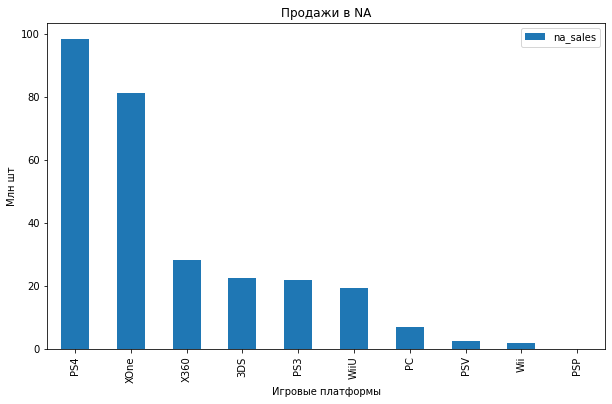

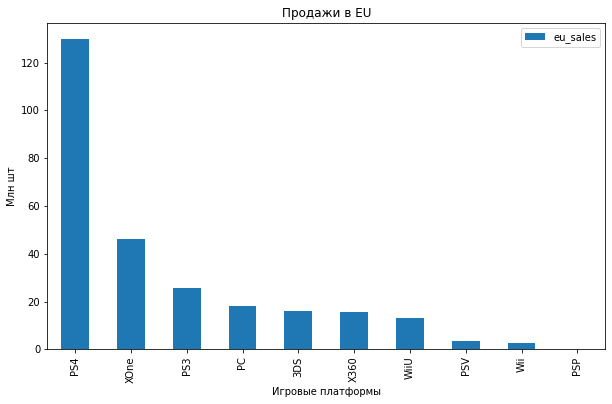

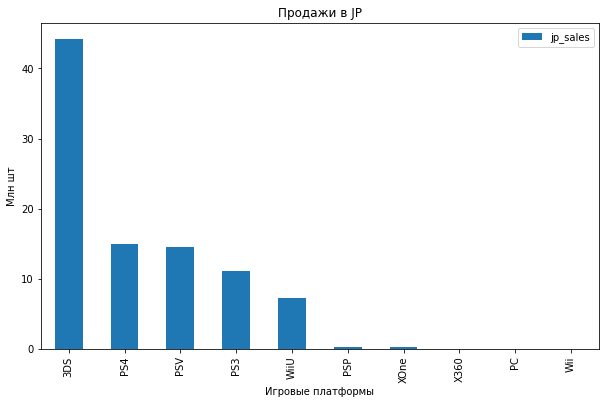

In [25]:
actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые платформы', ylabel = 'Млн шт', title = 'Продажи в NA')
plt.show()
actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые платформы', ylabel = 'Млн шт', title = 'Продажи в EU')
plt.show()
actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые платформы', ylabel = 'Млн шт', title = 'Продажи в JP')
plt.show()

Как мы видим в Северной Америке (NA) наибольшая популярность у PS4, немного отстает от неё XOne, далее с существенным отставанием следуют X360, 3DS и PS3, остальные платформы отстают от лидеров в разы.
В Европе (EU) также лидирует PS4, XOne идет на втором месте, но уже существенно отстает от первого, затем идет PS3, PC, 3DS и X360, остальные платформы также существенно отстают от лидера.
В Японии (JP) наибольшая популярность у 3DS, PS4 идет на втором месте и отстает от нее в несколько раз, следом идет PSV, затем PS3 и WiiU, а вот XOne в Японии не пользуется большой популярностью и находится на одном из последних мест по продажам.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры

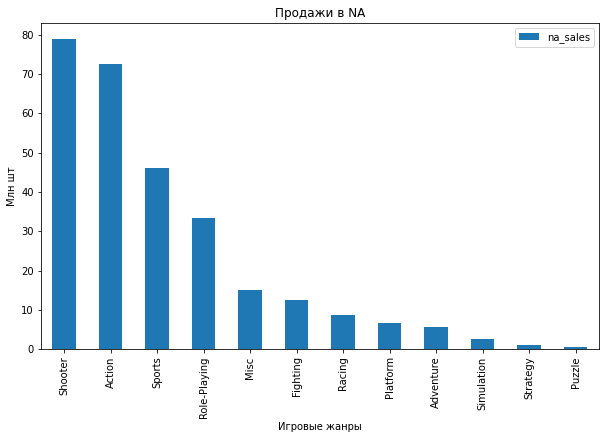

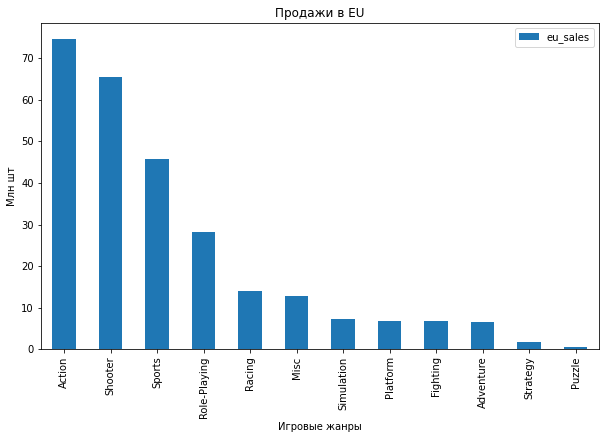

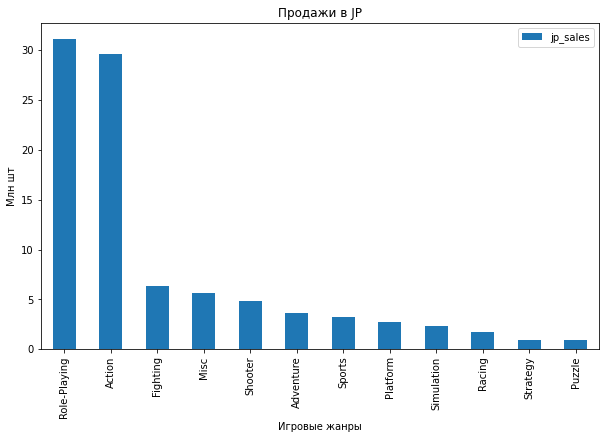

In [26]:
actual_period.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые жанры', ylabel = 'Млн шт', title = 'Продажи в NA')
plt.show()
actual_period.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые жанры', ylabel = 'Млн шт', title = 'Продажи в EU')
plt.show()
actual_period.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Игровые жанры', ylabel = 'Млн шт', title = 'Продажи в JP')
plt.show()

Как мы видим самым популярным жанром в Северной Америке (NA) является Shooter, слегка отстают игры в жанре Action, далее следует Sports, Role-Playing и Misc, остальные жанры отстают от лидеров в разы. В Европе (EU) наибольшая популярность у Action игр, далее идут игры в жанре Shooter, а затем Sports, Role-Playing и Racing. В Японии (JP) наибольшая популярность у Role-Playing и Action, далее следуют с существенным отставанием игры в жанре Fighting, Misc и Shooter.

Посмотрим как влияет рейтинг ESRB на продажи в каждом регионе

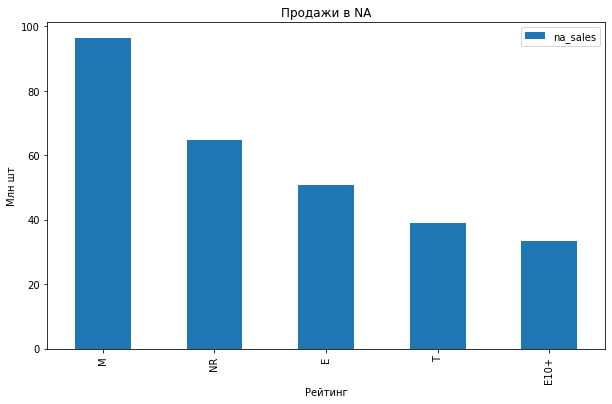

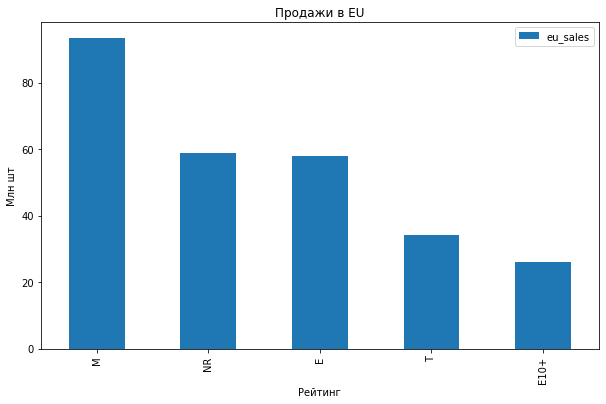

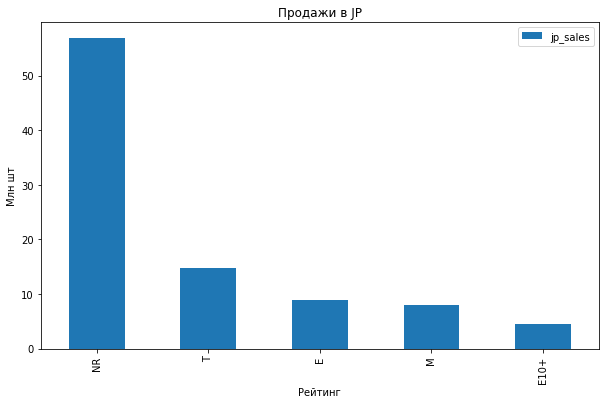

In [27]:
actual_period.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Рейтинг', ylabel = 'Млн шт', title = 'Продажи в NA')
plt.show()
actual_period.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Рейтинг', ylabel = 'Млн шт', title = 'Продажи в EU')
plt.show()
actual_period.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending = False).plot(kind='bar', figsize = (10,6),xlabel = 'Рейтинг', ylabel = 'Млн шт', title = 'Продажи в JP')
plt.show()

Как мы видим в Северной Америке (NA) больше всего продается игр с рейтингом M («Mature») — «Для взрослых», далее идут игры без рейтинга NR, примерно в половину меньше по сравнению с  лидером игр с рейтингом Е («Everyone») — «Для всех» и еще чуть меньше с рейтингами Т («Teen») — «Подросткам» и E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше». В Европе (EU) аналогичная картина, что и в Северной Америке. В Японии (JP) же больше всего игр без рейтинга, с большим отставанием идут игры с рейтингом Т, далее идут игры с рейтингами Е и М, а меньше всего с рейтингом E10+.

<b>Вывод: </b> В Северной Америке (NA) пользователи чаще всего предпочитают играть на PS4 и XOne в игры в жанрах Shooter и Action с рейтингом М. В Европе (EU) похожая картина, только пользователи ощутимо чаще выбирают PS4 в качестве игровой платформы и Action игры чуть более популярны чем Shooter игры, но наиболее популярный рейтинг игр все также М. В Японии (JP) же все иначе: наибольшая популярность у платформы 3DS, а только затем с ощутимым отставанием идет PS4, наибольшая популярность у игр в жанре Role-Playing и Action без рейтинга.

### Проверка гипотез

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:\
Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC разные\
Зададим пороговое значение alpha = 5%\
При выборе метода проверки гипотезы учитываем то, что рассматриваемые нами совокупности не зависят друг от друга

In [28]:
print('Средний пользовательский рейтинг PC:', pc['user_score'].mean())
print('Средний пользовательский рейтинг XOne:', xone['user_score'].mean())

alpha = 0.05
results = st.ttest_ind(pc['user_score'], xone['user_score'], equal_var = False, nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг PC: 6.298360655737704
Средний пользовательский рейтинг XOne: 6.594545454545454
p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Как мы видим нам не удалось отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:\
Нулевая гипотеза H₀: средние пользовательские рейтинги жанров Action и Sports одинаковые\
Альтернативная гипотеза H₁: средние пользовательские рейтинги жанров Action и Sports разные\
Зададим пороговое значение alpha = 5%\
При выборе метода проверки гипотезы учитываем то, что рассматриваемые нами совокупности не зависят друг от друга

In [29]:
action = actual_period.loc[actual_period["genre"]=='Action']
sports = actual_period.loc[actual_period["genre"]=='Sports']
print('Средний пользовательский рейтинг Action:',action['user_score'].mean())
print('Средний пользовательский Sports:', sports['user_score'].mean())

alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False, nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг Action: 6.760606060606061
Средний пользовательский Sports: 5.225196850393701
p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Как мы видим нам удалось отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия

<b>Вывод: </b> мы проверили гипотезы и определили, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий, а средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

### Общий вывод

Мы определили, что наиболее популярные и перспективные на актуальный момент платформы PS4 и XOne, определили число продаж по всем регионам для актуальных платформ, изучили влияние оценок критиков и пользователей на продажи игр - было определено, что оно весьма мало, а также определили наиболее популярные и прибыльные жанры - ими оказались "Shooter", "Sports" и "Platform", а наименее популярными и прибыльными жанрами оказались "Puzzle" и "Adventure". Узнали, что в Северной Америке пользователи чаще всего предпочитают играть на PS4 и XOne в игры в жанрах Shooter и Action с рейтингом М. В Европе пользователи ощутимо чаще выбирают PS4 в качестве игровой платформы и Action игры чуть более популярны чем Shooter игры, наиболее популярный рейтинг игр М. В Японии наибольшая популярность у платформы 3DS, а только затем с ощутимым отставанием идет PS4, наибольшая популярность у игр в жанре Role-Playing и Action без рейтинга. А также мы проверили гипотезы и определили, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий, а средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.\
В 2017 году следует сконцентрировать внимание на играх в жанрах "Shooter" для платформ PS4 и XOne, при этом следует учитывать региональную специфику и то, с каким рынком придется работать, т.к. японский рынок по многим параметрам отличается от американского и европейского.